# Convex Optimization

<!--eofm-->

Note:
These notes are not mathematically rigorous. These are meant for quick reference, please read the [Convex Optimization book](https://web.stanford.edu/~boyd/cvxbook/) from Boyd and Vandenberghe for more rigorous treatment.

## Chapter 2: Convex Sets

### Sets

#### Affine Sets

Affine combination: $\sum_{i=1}^{i=N} \theta_i x_i$ such that $\sum_{i=1}^{i=N} \theta_i = 1$.

Draw a line passing through any two points, if the whole line is in the set, the set is affine.

Every affine set C can be written as $C = V + x_0$ for any $x_0 \in C$, where V is a subspace.

Affine Hull of C (**aff** C)
: Smallest affine set, which contains C.

Affine Dimension
: Dimension of an affine hull.

Relative Interior
: **relint** C = {x ∈ C | B(x, r) ∩ aff C ⊆ C for some r > 0}.

Boundary
: **cl** C - **relint** C

##### Example

Let C = $\{x \in R^3 | −1 \le x_1 \le 1, −1 \le x_2 \le 1, x_3 = 0\}$. That is a square.

- Interior: Empty
- Relative interior: square without the border
- Boundary: the perimeter

#### Convex Sets

Convex combination
: $\sum_{i=1}^{i=N} \theta_i x_i$ such that $\sum_{i=1}^{i=N} \theta_i = 1$ and $\theta_i \ge 0$.

Draw a line segment between any two points, if the whole line segment is in the set, the set is convex.

#### Cones

Cone
: A set C is called a cone, if for every x ∈ C and θ ≥ 0 we have $\theta x \in C$

Convex Cone
: A set C is convex cone, if it is convex and a cone!

Conic Combination
:  $\sum_{i=1}^{i=N} \theta_i x_i$ such that $\theta_i \ge 0$.

### Some Important Examples

| example                | affine? | convex? | convex cone?  |
| ---------------------- | ------- | ------- | ------------- |
| hyperplane             | Y       | Y       | Y<sup>1</sup> |
| halfspace              | N       | Y       | Y<sup>1</sup> |
| norm ball              | N       | Y       | N             |
| norm cones             | N       | Y       | Y             |
| polyhedra              |         | Y       |               |
| positive definite cone |         | Y       | Y             |

1. Only if 0 is in the set.

Hyperplane
: $\{x | a^T x = b\} = \{x | a^T(x-x_0) = 0\}$ for constant vector a and scalar b. Where $x_0$ is any point in the hyperplane.

Closed Half spaces
: $\{x | a^T x \le b\}$

Euclidean Ball
: $B(x_c, r) = \{ x \, | \, \| x - x_c \|_2 \le r \} = \{  x_c + ru \, | \, \| u \|_2 \le 1\}$.

Ellipsoid
: $ E = \{ x \, | \, (x - x_c)^T P^{-1} (x-x_c) \le 1 \} = \{ x_c + Au \, | \, \| u \|_2 \le 1 \}$. Where, P is positive definite matrix, and A is square and non singular matrix.

Norm Cones
: $\{ (x, t) \, | \, \| x \| \le t\} \subset R^{n+1}$.

Second order cone (Lorentz cone)
: Norm cone where norm is euclidean norm.

Polyhedron
: A polyhedron is thus the intersection of a finite number of halfspaces and hyperplanes.

Simplex
: Simplex is a special polyhedron. If $v_0, \dots, v_k$ are affinely independent (that is $v_1-v_0, \dots , v_k-v_0$ are linearly independent) then simplex is just convex hull of $(v_0, \dots, v_k)$.



### Operations that preseve convexity

#### Intersection

If $S_\alpha$ is a convex set for for every $\alpha \in \cal{A}$ where $\cal{A}$ is any set (could be uncountable infinite), then $\cap_{\alpha \in \cal{A}} S_\alpha$ is also convex. Converse is also true. Every closed convex set S is a (usually infinite) intersection of halfspaces.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, num=100)
ts = np.linspace(-np.pi/3, np.pi/3, num=20)

In [18]:
def S(t):
    c1, c2 = np.array([np.cos(t), np.cos(2*t)])
    c, m = 1/c2, c1/c2
    return (lambda x: c - m*x, lambda x: -c - m*x)

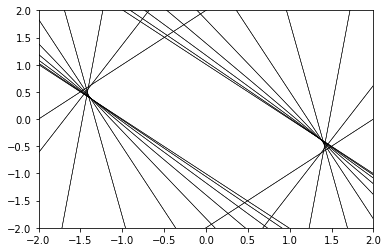

In [41]:
for t in ts:
    y1, y2 = S(t)
    plt.plot(x, y1(x), 'k', lw='.5');
    plt.plot(x, y2(x), 'k', lw='.5');
plt.ylim(-2, 2);
plt.xlim(-2, 2);

#### Affine Functions

Function f is affine if f = Ax + b for some A and b.

If S is convex then the image of S under f (i.e. $f(S) = \{f(x) | x \in S\}$) is also convex. 

If g is a function such that the image of g is S and S is convex, then the inverse image of S (i.e. $\{x | g(x) \in S\}$) is also convex.